# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer:

The outcome is usually the dependent variable of the study, which is depending on the independent variables. 
In this case, the outcome is the **free-tier customer that will convert to paying customers** 

#### 2. What are the predictors/covariates? 

Answer: 

The predictors/covariates are the independent variables
In this case, **demographic data collected at signup** and **customer useage data** are the predictors/covariates


#### 3. What timeframe is this data relevent for?

Answer: 

The data is based on Hooli data from Jan 2015 to Apr 2015. This is the timeframe.

#### 4. What is the hypothesis?

Answer: 

A free-tier customers will more likely to covert to paying customers 
    1. if they have a high activity score
    2. if their days since last log in is closer to today
    3. if their profession is an engineer

by using the Hooli data from January to April 2015

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Data Type | Acceptable Values | Type of Variable | Description
:------- | :-------- | :---------------- | :--------------- | :----------
admit | Integer | 0, 1 | categorical | Inidicate if candidate was admit or not (admit=1, NOT admit = 0)
gre | Integer | 260 ~ 346 | continuous | GRE test score
gpa | Float | 0 ~ 4 | continuous | Grade points average (with 2 decimals)
prestige | Integer | 1, 2, 3, 4 | categorical | Rank of applicant's undergraduate alma mater (1 being the highest, 4 as the lowest)


We would like to explore the association between X and Y 

#### 2. What is the outcome?

Answer:

Indication of candidate admit to UCLA or not

#### 3. What are the predictors/covariates? 

Answer:

GRE score, GPA, Prestige level

#### 4. What timeframe is this data relevent for?

Answer:

Timeframe for the data is unclear. The Blog was posted in 2013, the data could be anytime before the post.

#### 4. What is the hypothesis?

Answer:

Using the data from yhat's blog, Candidates will more likely to get admitted to UCLA
    1. if their GRE scores are higher
    2. if GPAs are higher
    3. if the rank of their alma maters are higher

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

admissions_cvs = pd.read_csv('admissions.csv')

#### 1. What are the goals of the exploratory analysis? 

Answer:

The goals of the exploratory analysis is do a preliminary analysis to make sense and get insight of the data by looking at the patterns, trends, outliers, unexpected results ... etc.

Also include:
1. Spotting missing data
2. Mapping out the underlying structure 
3. Identifying important variables
4. Listing outliers



#### 2a. What are the assumptions of the distribution of data? 

Answer:

Normal distribution is a big assumption to make. It is very important to understand the distribution of the data before applying any statistical test. Generally we are assuming that the samples we aquired are from a population of data which follow the the normal distribution. This help to makse statistic alot easier and more feasible. 


We also assume that if we are collecting data from different group, even though the mean for different group will be different, the variance will be the same

#### 2b. How will determine the distribution of your data? 

Answer: 

The following will determine the normal distrubution:
1. Mean - the location for the center of the graph
2. Standard Deviation - how spread out the data is
3. Skewness - measure of the asymmetry of the probability distribution
4. Kurtosis - measure the data are peak of flat relative to perfect normal distribution


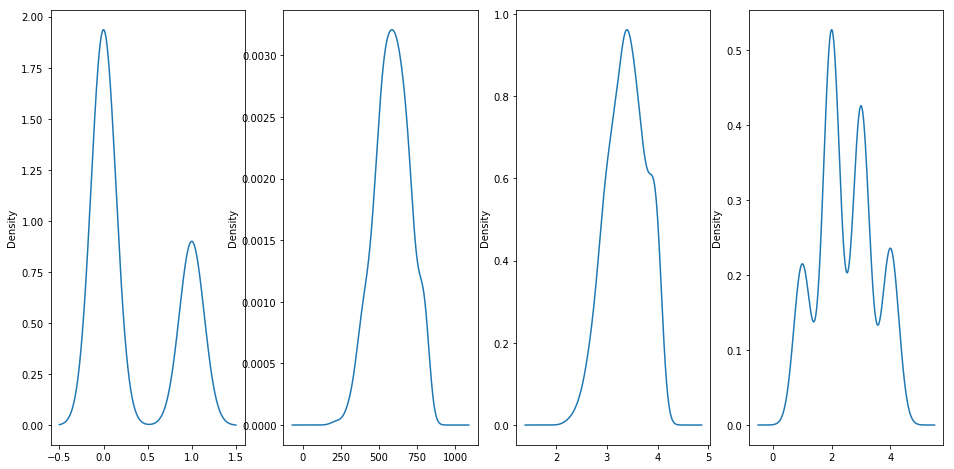

In [9]:
data = pd.DataFrame(admissions_cvs)
fig, axs = plt.subplots(1, 4)
data['admit'].plot(kind='density', ax=axs[0], figsize=(16, 8))
data['gre'].plot(kind='density', ax=axs[1])
data['gpa'].plot(kind='density', ax=axs[2])
data['prestige'].plot(kind='density', ax=axs[3])

In [18]:
data.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### 3a. How might outliers impact your analysis? 

Answer:

Outliers will heavily impact the mean of the data, which in terms will break the data away from being normally distributed.

#### 3b. How will you test for outliers? 

Answer:

An outlier is if the data falls more than 1.5*IQR (interquartile range) above the upper (Q1) and lower(Q3) quartile.

By sorting the data and calculate the upper and lower quartile and IQR. We can then calculate the boundary of the acceptable data. Anything outside the boundary will be an outlier


Acceptable range (Inner Fences)
 Q1 - (1.5 * IQR) < Data < Q3 + (1.5 * IQR) 
 
 
If i plot the box graph in python, I can also spot the outlier. 
see below, circle means the data is consider outliers

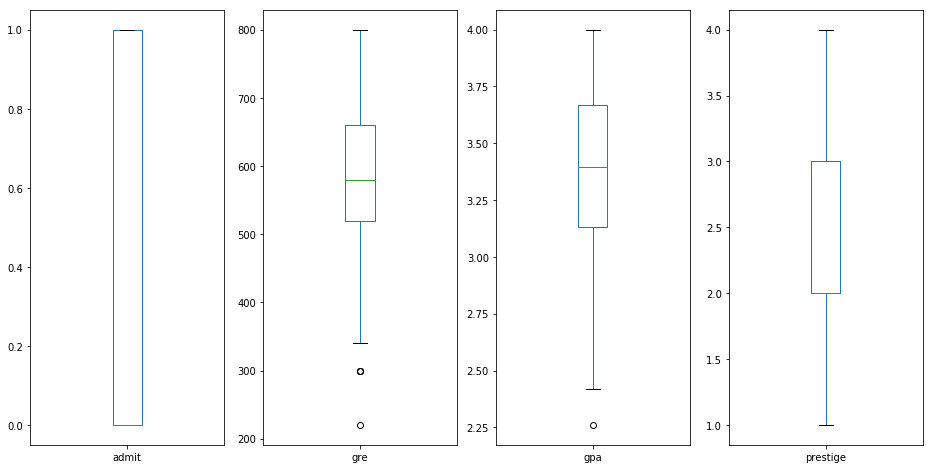

In [12]:
fig, axs = plt.subplots(1, 4)
data['admit'].plot(kind='box', ax=axs[0], figsize=(16, 8))
data['gre'].plot(kind='box', ax=axs[1])
data['gpa'].plot(kind='box', ax=axs[2])
data['prestige'].plot(kind='box', ax=axs[3])

#### 4a. What is colinearity? 

Answer: 

If a set of data points are lying on a single line, then the data set have the property of collinearity

In statisic, this means that there is correlation between the independent variables, and the independents variables has an linear relationship.  

#### 4b. How will you test for colinearity? 

Answer:

- Using the correlation matrix, we can determine if there is a strong relationship between the variables. (see below)

- In the model we can spot a lagre changes in the estimate coefficent when an independent variable is introduced or removed from the model

- We can also test the colinearity using Variance inflation factor(VIF), if the VIF is 5 or 10 and above, this indicate a collinearity problem


In [15]:
data.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 


1. Examining the data that was present in admissions.csv
2. Create a data dictionary
3. Identify the dependent and independent variables
4. Develop the hypothesis
1. Make assumption of the distribution
    1.Assuming the population is in normal distribution
2. Make a simple plot to determine the distrubution of the data
    1. Evalute: Mean, Medium, STD, Skewness and Kurtosis
3. Do anaylsis for the any outliers
    1. Box Plot
    2. Calculating the inner fences with: Q1 - (1.5 IQR) < Data < Q3 + (1.5 IQR)
4. Identify collinearity
    1. Use correlation matrix

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

1. I  will use OLS model to anaylsis the relationship each independent variable have with the dependent variable. Use the coefficient from the analysis to predict the outcome 
2. Determine the difference of the GPA and GRE score amoung the 4 ranking of undergraduate alma mater.
3. The alternative model might encounter a small sample size of only four ranking level.